<div style="border: 5px solid purple; padding: 15px; margin: 5px">
<b> Reviewer's comment</b>
    
Hi, my name is Svetlana (https://hub.tripleten.com/u/6dee602c). Congratulations on submitting another project! 🎉  I will be using the standard color marking. 
   
    
<div style="border: 5px solid green; padding: 15px; margin: 5px">

Great solutions and ideas that can and should be used in the future are in green comments. You have successfully normalized the `review` column, employed advanced techniques such as lemmatization and vectorizing, trained multiple models including a dummy baseline, and applied the `evaluate_model()` method for their assessment. Great job! The results look very good.

</div>
    
<div style="border: 5px solid gold; padding: 15px; margin: 5px">
<b> Reviewer's comment </b>

Yellow color indicates what should be optimized. This is not necessary, but it will be great if you make changes to this project. 

        
</div>
<div style="border: 5px solid red; padding: 15px; margin: 5px">
<b> Reviewer's comment </b>

Issues that must be corrected to achieve accurate results are indicated in red comments. However, there are no such issues, great job! 
</div>        
<hr>
    
<font color='dodgerblue'>**To sum up:**</font> thank you for such an excellent job! You showed strong coding skills and a solid understanding of this topic, which is quite hard. I hope you enjoyed working on this project. You have successfully analyzed the distributions, employed advanced techniques such as lemmatization and vectorizing, and trained several models. The models were trained and evaluated correctly. Please do not worry about Bert, we indeed do not need to run it here. 
    
I've left several comments, but I do not have any questions, so the project is accepted. 


<hr> 
    
✍️ If you are interested in Large Language Models, check out [Intro to Large Language Models](https://www.youtube.com/watch?v=zjkBMFhNj_g) and [Tokenization lecture](https://www.youtube.com/watch?v=zduSFxRajkE) by Andrej Karpathy, one of the leading scientists in this area.  He has also recently published a nice [Deep Dive into LLMs like ChatGPT](https://www.youtube.com/watch?v=7xTGNNLPyMI) tutorial where he explains all LLM preparation stages and a very useful video about how he uses LLM [here](https://www.youtube.com/watch?v=EWvNQjAaOHw&feature=youtu.be). This is a comprehensive guide on how to choose the optimal tool for your tasks while saving time and money.
 
    
    
I would also like to recommend this new <font color='purple'>**Language Modeling from Scratch Spring 2025 class by Stanford**</font>. This class has just started. There are three links: [Recorded lectures on Youtube](https://www.youtube.com/playlist?list=PLoROMvodv4rOY23Y0BoGoBGgQ1zmU_MT_), [course website](https://stanford-cs336.github.io/spring2025/), and the [GitHub repository with assignments and jupyter notebooks](https://github.com/stanford-cs336). This course is up-to-date, so the information there is super relevant today.

    
    
By the way, Hugging Face has a good free [NLP course](https://huggingface.co/learn/nlp-course/en/chapter0/1).
    
    
Here's a link to [AI for beginners](https://github.com/microsoft/ai-for-beginners) course by Microsoft. 
        
    
    
<hr>
    
Congratulations and good luck! 
</div>

# Project Statement

The Film Junky Union, a new edgy community for classic movie enthusiasts, is developing a system for filtering and categorizing movie reviews. The goal is to train a model to automatically detect negative reviews. You'll be using a dataset of IMBD movie reviews with polarity labelling to build a model for classifying positive and negative reviews. It will need to have an F1 score of at least 0.85.

## Initialization

In [1]:
import math

import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import lightgbm as lgb
import spacy
import warnings
warnings.filterwarnings('ignore', category=UserWarning, module='seaborn')

from tqdm.auto import tqdm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score, classification_report

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'png'
# the next line provides graphs of better quality on HiDPI screens
%config InlineBackend.figure_format = 'retina'

plt.style.use('seaborn')

In [3]:
# this is to use progress_apply, read more at https://pypi.org/project/tqdm/#pandas-integration
tqdm.pandas()

## Load Data

In [4]:
df_reviews = pd.read_csv('/datasets/imdb_reviews.tsv', sep='\t', dtype={'votes': 'Int64'})

In [5]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47331 entries, 0 to 47330
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           47331 non-null  object 
 1   title_type       47331 non-null  object 
 2   primary_title    47331 non-null  object 
 3   original_title   47331 non-null  object 
 4   start_year       47331 non-null  int64  
 5   end_year         47331 non-null  object 
 6   runtime_minutes  47331 non-null  object 
 7   is_adult         47331 non-null  int64  
 8   genres           47331 non-null  object 
 9   average_rating   47329 non-null  float64
 10  votes            47329 non-null  Int64  
 11  review           47331 non-null  object 
 12  rating           47331 non-null  int64  
 13  sp               47331 non-null  object 
 14  pos              47331 non-null  int64  
 15  ds_part          47331 non-null  object 
 16  idx              47331 non-null  int64  
dtypes: Int64(1),

In [6]:
df_reviews.head()

,tconst,title_type,primary_title,original_title,start_year,end_year,runtime_minutes,is_adult,genres,average_rating,votes,review,rating,sp,pos,ds_part,idx
0,tt0068152,movie,$,$,1971,\N,121,0,"Comedy,Crime,Drama",6.3,2218,The pakage implies that Warren Beatty and Gold...,1,neg,0,train,8335
1,tt0068152,movie,$,$,1971,\N,121,0,"Comedy,Crime,Drama",6.3,2218,How the hell did they get this made?! Presenti...,1,neg,0,train,8336
2,tt0313150,short,'15','15',2002,\N,25,0,"Comedy,Drama,Short",6.3,184,There is no real story the film seems more lik...,3,neg,0,test,2489
3,tt0313150,short,'15','15',2002,\N,25,0,"Comedy,Drama,Short",6.3,184,Um .... a serious film about troubled teens in...,7,pos,1,test,9280
4,tt0313150,short,'15','15',2002,\N,25,0,"Comedy,Drama,Short",6.3,184,I'm totally agree with GarryJohal from Singapo...,9,pos,1,test,9281


In [7]:
# Check what columns you have
print("Columns:", df_reviews.columns.tolist())
print("Shape:", df_reviews.shape)
print("\nData types:")
print(df_reviews.dtypes)

Columns: ['tconst', 'title_type', 'primary_title', 'original_title', 'start_year', 'end_year', 'runtime_minutes', 'is_adult', 'genres', 'average_rating', 'votes', 'review', 'rating', 'sp', 'pos', 'ds_part', 'idx']
Shape: (47331, 17)

Data types:
tconst              object
title_type          object
primary_title       object
original_title      object
start_year           int64
end_year            object
runtime_minutes     object
is_adult             int64
genres              object
average_rating     float64
votes                Int64
review              object
rating               int64
sp                  object
pos                  int64
ds_part             object
idx                  int64
dtype: object


In [8]:
# Focus on what matters for sentiment analysis
core_columns = ['review', 'pos', 'ds_part']
print("Missing values in core columns:")
print(df_reviews[core_columns].isnull().sum())

print(f"\nDataset split:")
print(df_reviews['ds_part'].value_counts())

print(f"\nSentiment distribution:")
print(df_reviews['pos'].value_counts())

Missing values in core columns:
review     0
pos        0
ds_part    0
dtype: int64

Dataset split:
train    23796
test     23535
Name: ds_part, dtype: int64

Sentiment distribution:
0    23715
1    23616
Name: pos, dtype: int64


The core columns needed are clean. No missing values, all reviews have text and labels. Balanced dataset, almost equal positive and negative review numbers. Nearly a 50/50 split with the train/test split. 

## Text Preprocessing 

In [9]:
# looking at some sample reviews
print("Sample positive review:")
print(df_reviews[df_reviews['pos'] == 1]['review'].iloc[0][:200] + "...")

print("\nSample negative review:")
print(df_reviews[df_reviews['pos'] == 0]['review'].iloc[0][:200] + "...")

# Checking review lengths
df_reviews['review_length'] = df_reviews['review'].str.len()
print(f"\nReview length stats:")
print(df_reviews['review_length'].describe())

Sample positive review:
Um .... a serious film about troubled teens in Singapore, a country I have not much knowledge on but have the previous wrong impression that all the kids there are highly disciplined and controlled by...

Sample negative review:
The pakage implies that Warren Beatty and Goldie Hawn are pulling off a huge bank robbery, but that's not what I got out of it! I didn't get anything! In the first half there's a new character (withou...

Review length stats:
count    47331.000000
mean      1290.030973
std        974.976807
min         32.000000
25%        691.000000
50%        957.000000
75%       1566.000000
max      13594.000000
Name: review_length, dtype: float64


<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
    
Good! 
</div>

## EDA

Let's check the number of movies and reviews over years.

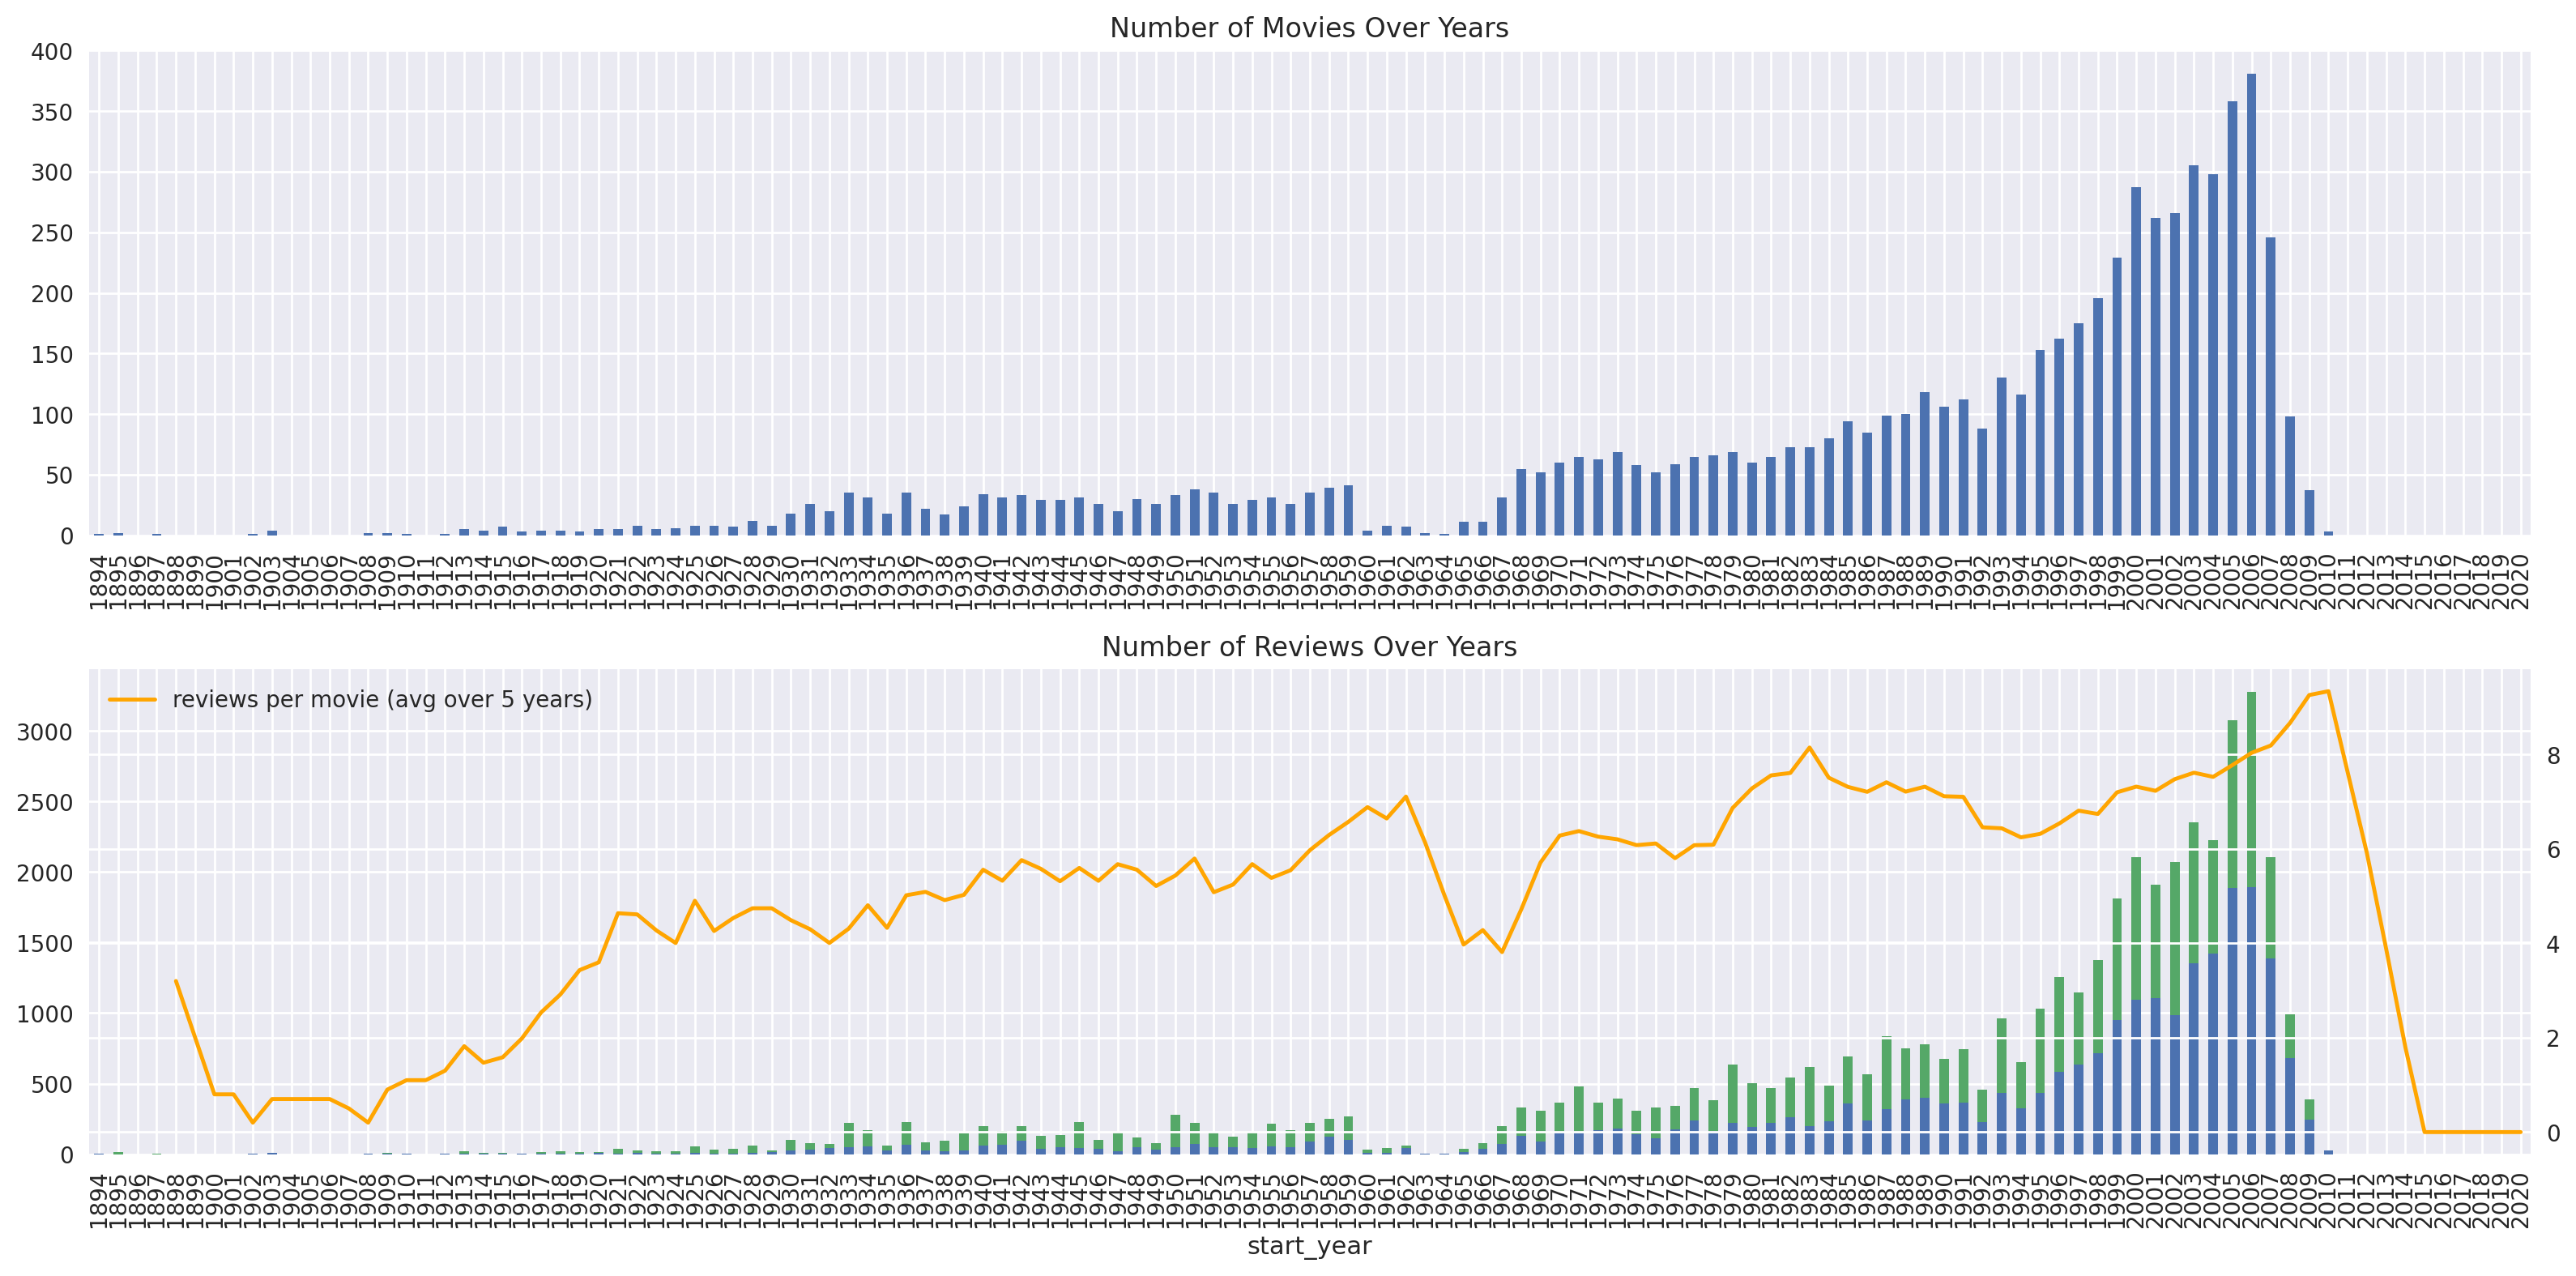

In [10]:
fig, axs = plt.subplots(2, 1, figsize=(16, 8))

ax = axs[0]

dft1 = df_reviews[['tconst', 'start_year']].drop_duplicates() \
    ['start_year'].value_counts().sort_index()
dft1 = dft1.reindex(index=np.arange(dft1.index.min(), max(dft1.index.max(), 2021))).fillna(0)
dft1.plot(kind='bar', ax=ax)
ax.set_title('Number of Movies Over Years')

ax = axs[1]

dft2 = df_reviews.groupby(['start_year', 'pos'])['pos'].count().unstack()
dft2 = dft2.reindex(index=np.arange(dft2.index.min(), max(dft2.index.max(), 2021))).fillna(0)

dft2.plot(kind='bar', stacked=True, label='#reviews (neg, pos)', ax=ax)

dft2 = df_reviews['start_year'].value_counts().sort_index()
dft2 = dft2.reindex(index=np.arange(dft2.index.min(), max(dft2.index.max(), 2021))).fillna(0)
dft3 = (dft2/dft1).fillna(0)
axt = ax.twinx()
dft3.reset_index(drop=True).rolling(5).mean().plot(color='orange', label='reviews per movie (avg over 5 years)', ax=axt)

lines, labels = axt.get_legend_handles_labels()
ax.legend(lines, labels, loc='upper left')

ax.set_title('Number of Reviews Over Years')

fig.tight_layout()

Let's check the distribution of number of reviews per movie with the exact counting and KDE (just to learn how it may differ from the exact counting)

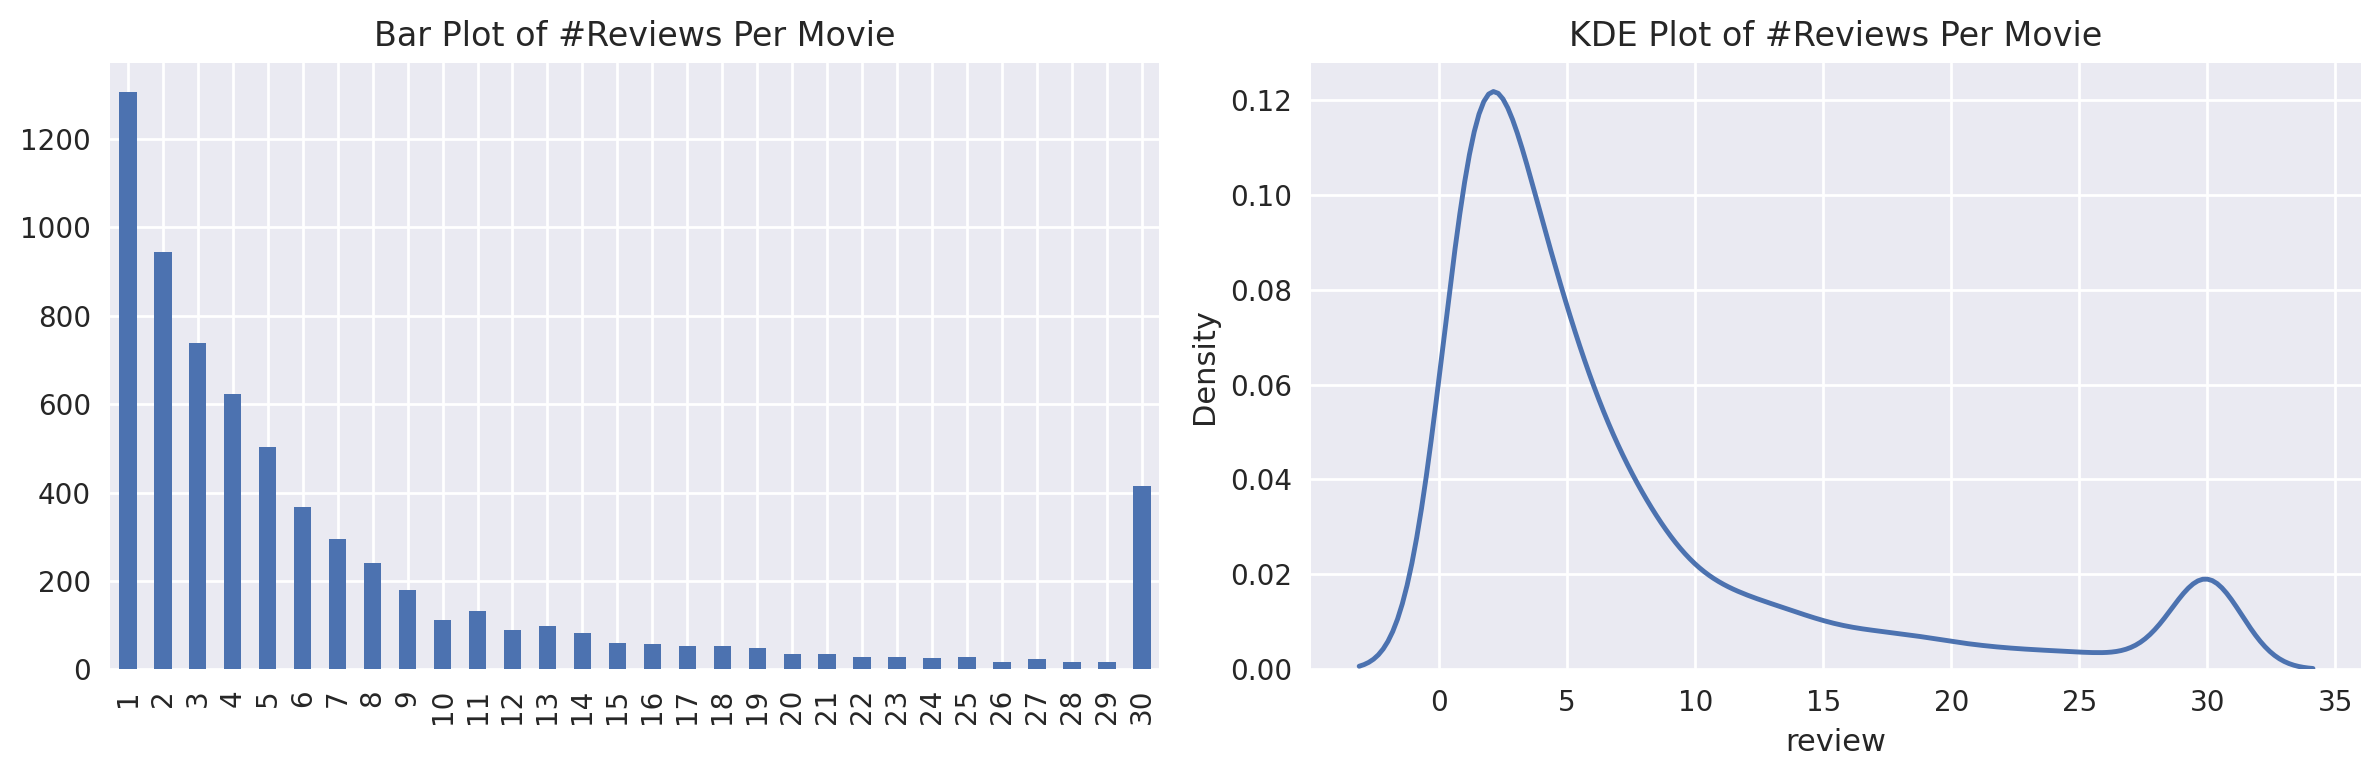

In [11]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

ax = axs[0]
dft = df_reviews.groupby('tconst')['review'].count() \
    .value_counts() \
    .sort_index()
dft.plot.bar(ax=ax)
ax.set_title('Bar Plot of #Reviews Per Movie')

ax = axs[1]
dft = df_reviews.groupby('tconst')['review'].count()
sns.kdeplot(dft, ax=ax)
ax.set_title('KDE Plot of #Reviews Per Movie')

fig.tight_layout()

In [12]:
df_reviews['pos'].value_counts(normalize=True)

0    0.501046
1    0.498954
Name: pos, dtype: float64

In [13]:
df_reviews['pos'].value_counts()

0    23715
1    23616
Name: pos, dtype: int64

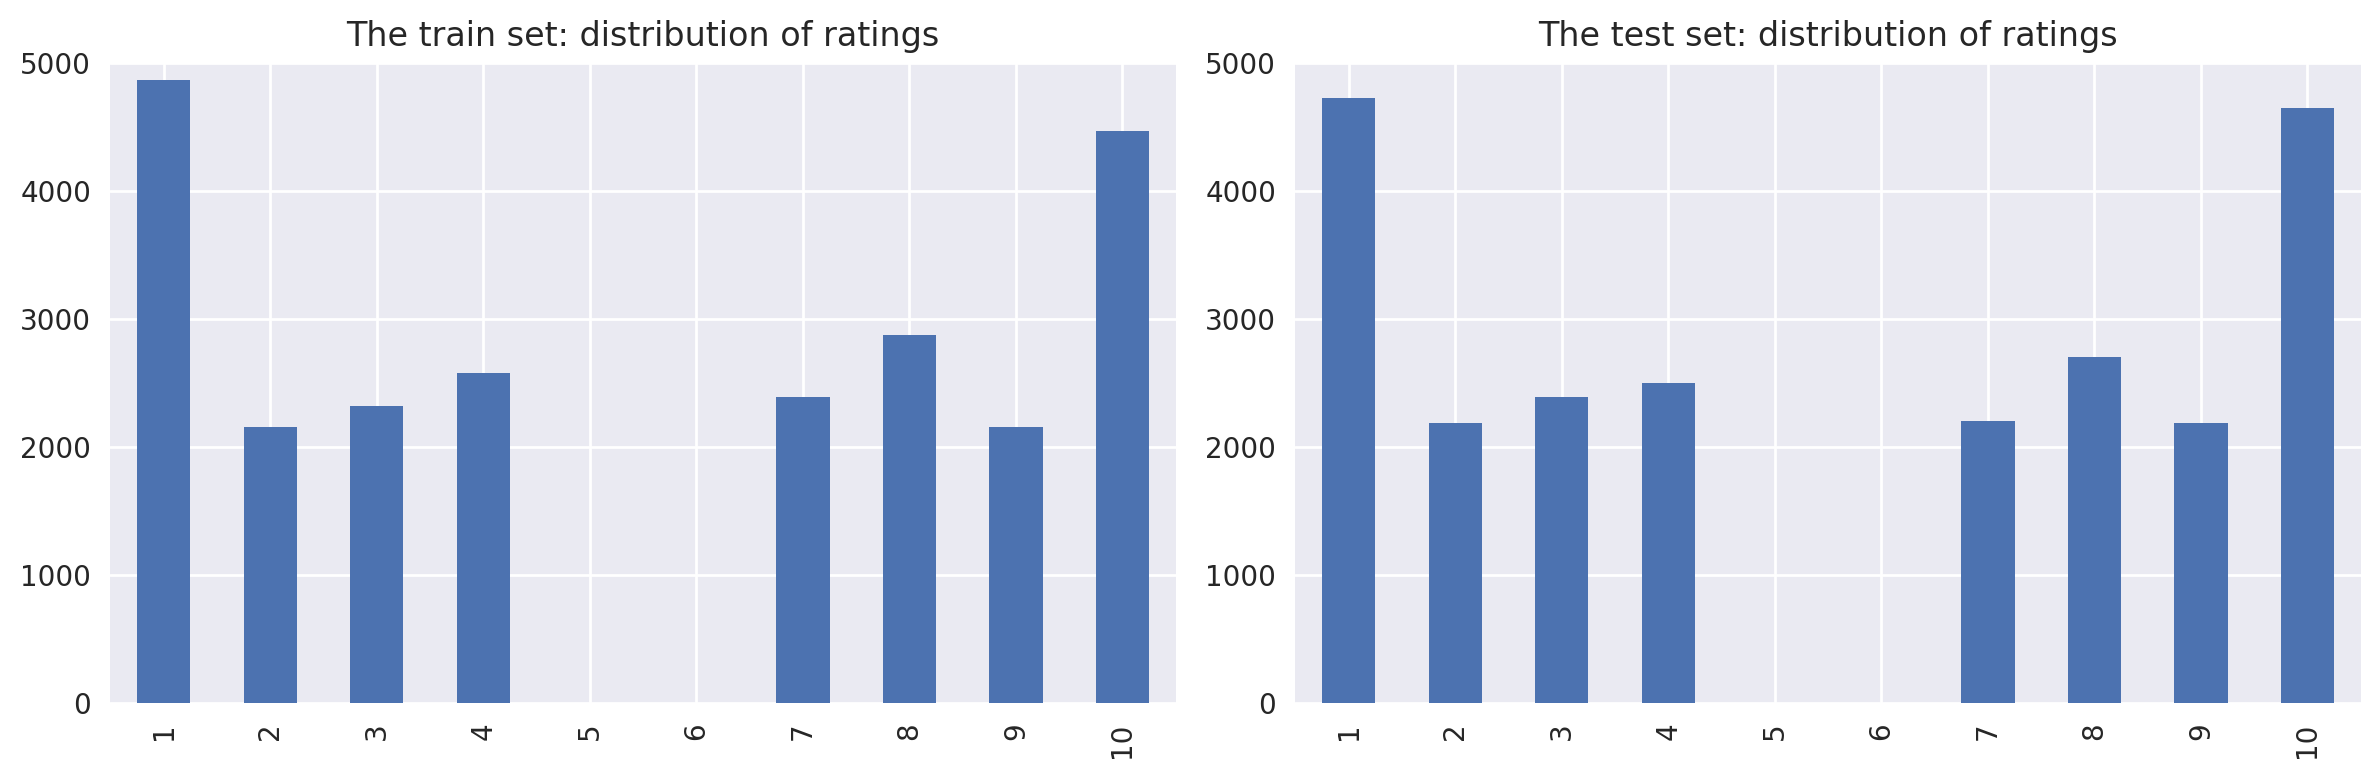

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

ax = axs[0]
dft = df_reviews.query('ds_part == "train"')['rating'].value_counts().sort_index()
dft = dft.reindex(index=np.arange(min(dft.index.min(), 1), max(dft.index.max(), 11))).fillna(0)
dft.plot.bar(ax=ax)
ax.set_ylim([0, 5000])
ax.set_title('The train set: distribution of ratings')

ax = axs[1]
dft = df_reviews.query('ds_part == "test"')['rating'].value_counts().sort_index()
dft = dft.reindex(index=np.arange(min(dft.index.min(), 1), max(dft.index.max(), 11))).fillna(0)
dft.plot.bar(ax=ax)
ax.set_ylim([0, 5000])
ax.set_title('The test set: distribution of ratings')

fig.tight_layout()

Both charts look mirrorly almost the same. There is no data leakage, reliable evaluation, can trust for real-world performance. 

Distribution of negative and positive reviews over the years for two parts of the dataset

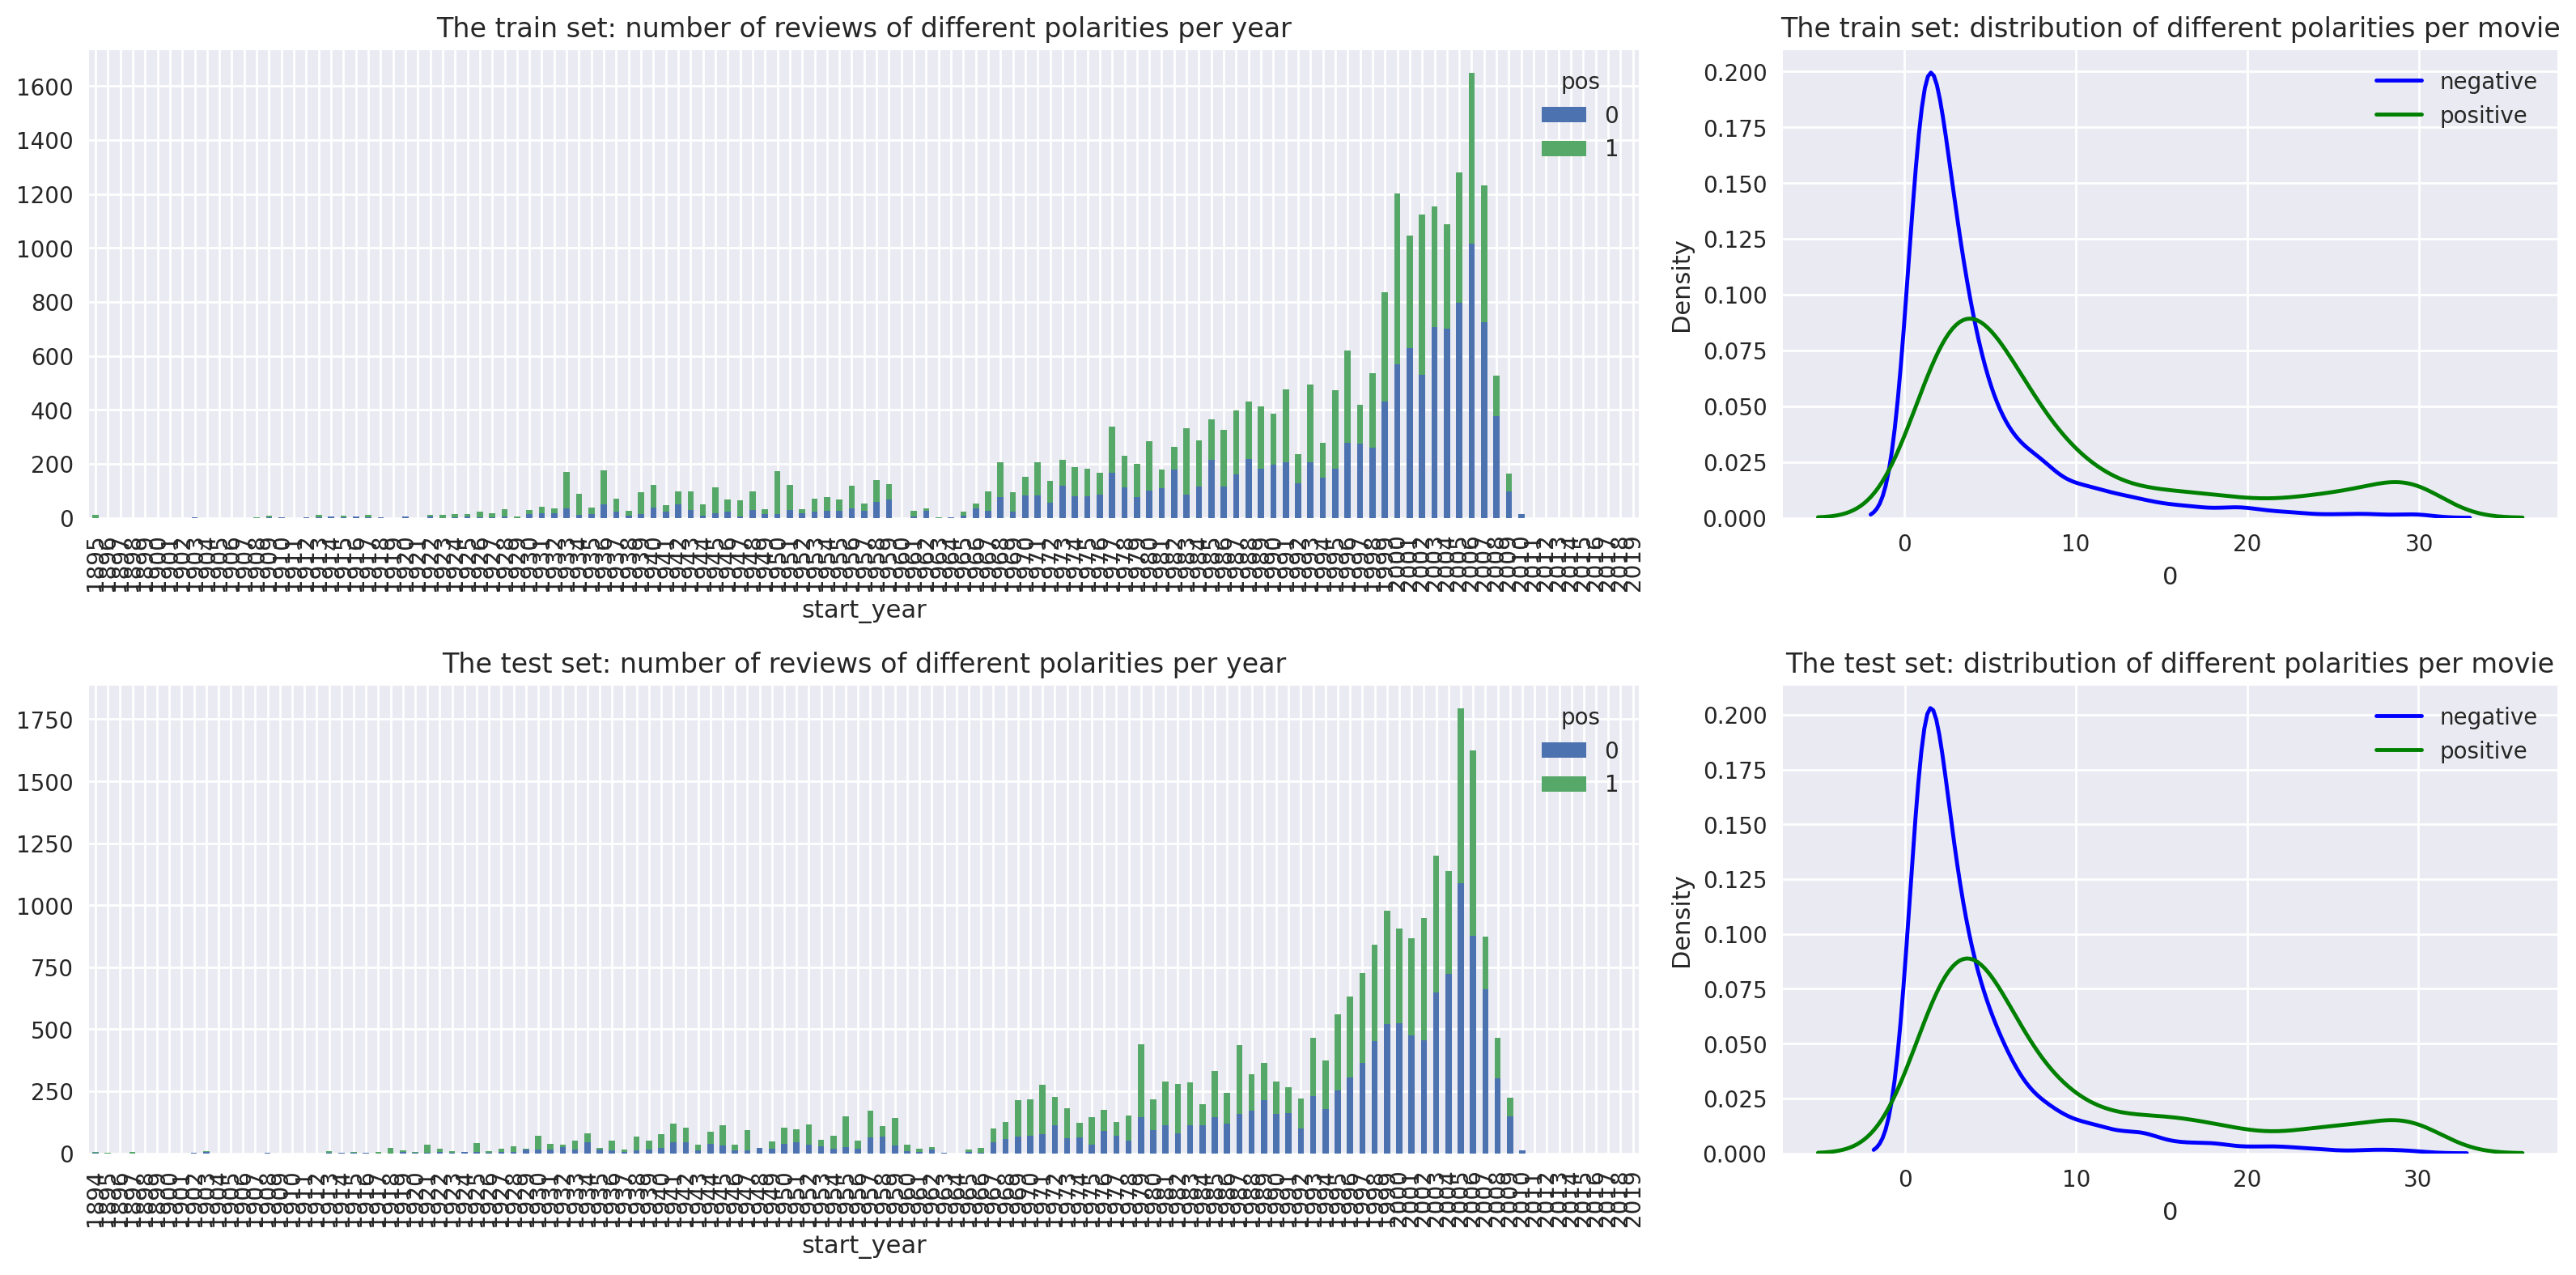

In [15]:
fig, axs = plt.subplots(2, 2, figsize=(16, 8), gridspec_kw=dict(width_ratios=(2, 1), height_ratios=(1, 1)))

ax = axs[0][0]

dft = df_reviews.query('ds_part == "train"').groupby(['start_year', 'pos'])['pos'].count().unstack()
dft.index = dft.index.astype('int')
dft = dft.reindex(index=np.arange(dft.index.min(), max(dft.index.max(), 2020))).fillna(0)
dft.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('The train set: number of reviews of different polarities per year')

ax = axs[0][1]

dft = df_reviews.query('ds_part == "train"').groupby(['tconst', 'pos'])['pos'].count().unstack()
sns.kdeplot(dft[0], color='blue', label='negative', kernel='epa', ax=ax)
sns.kdeplot(dft[1], color='green', label='positive', kernel='epa', ax=ax)
ax.legend()
ax.set_title('The train set: distribution of different polarities per movie')

ax = axs[1][0]

dft = df_reviews.query('ds_part == "test"').groupby(['start_year', 'pos'])['pos'].count().unstack()
dft.index = dft.index.astype('int')
dft = dft.reindex(index=np.arange(dft.index.min(), max(dft.index.max(), 2020))).fillna(0)
dft.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('The test set: number of reviews of different polarities per year')

ax = axs[1][1]

dft = df_reviews.query('ds_part == "test"').groupby(['tconst', 'pos'])['pos'].count().unstack()
sns.kdeplot(dft[0], color='blue', label='negative', kernel='epa', ax=ax)
sns.kdeplot(dft[1], color='green', label='positive', kernel='epa', ax=ax)
ax.legend()
ax.set_title('The test set: distribution of different polarities per movie')

fig.tight_layout()

i can see that the polarites per year positive is much higher. When you look at the per movie chart its showing negative as much higher. There may be some underlying structure in the dataset. 

<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
    
Well done! 
</div>

## Evaluation Procedure

Composing an evaluation routine which can be used for all models in this project

In [16]:
import sklearn.metrics as metrics

def evaluate_model(model, train_features, train_target, test_features, test_target):
    
    eval_stats = {}
    
    fig, axs = plt.subplots(1, 3, figsize=(20, 6)) 
    
    for type, features, target in (('train', train_features, train_target), ('test', test_features, test_target)):
        
        eval_stats[type] = {}
    
        pred_target = model.predict(features)
        pred_proba = model.predict_proba(features)[:, 1]
        
        # F1
        f1_thresholds = np.arange(0, 1.01, 0.05)
        f1_scores = [metrics.f1_score(target, pred_proba>=threshold) for threshold in f1_thresholds]
        
        # ROC
        fpr, tpr, roc_thresholds = metrics.roc_curve(target, pred_proba)
        roc_auc = metrics.roc_auc_score(target, pred_proba)    
        eval_stats[type]['ROC AUC'] = roc_auc

        # PRC
        precision, recall, pr_thresholds = metrics.precision_recall_curve(target, pred_proba)
        aps = metrics.average_precision_score(target, pred_proba)
        eval_stats[type]['APS'] = aps
        
        if type == 'train':
            color = 'blue'
        else:
            color = 'green'

        # F1 Score
        ax = axs[0]
        max_f1_score_idx = np.argmax(f1_scores)
        ax.plot(f1_thresholds, f1_scores, color=color, label=f'{type}, max={f1_scores[max_f1_score_idx]:.2f} @ {f1_thresholds[max_f1_score_idx]:.2f}')
        # setting crosses for some thresholds
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(f1_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(f1_thresholds[closest_value_idx], f1_scores[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('threshold')
        ax.set_ylabel('F1')
        ax.legend(loc='lower center')
        ax.set_title(f'F1 Score') 

        # ROC
        ax = axs[1]    
        ax.plot(fpr, tpr, color=color, label=f'{type}, ROC AUC={roc_auc:.2f}')
        # setting crosses for some thresholds
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(roc_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'            
            ax.plot(fpr[closest_value_idx], tpr[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.plot([0, 1], [0, 1], color='grey', linestyle='--')
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('FPR')
        ax.set_ylabel('TPR')
        ax.legend(loc='lower center')        
        ax.set_title(f'ROC Curve')
        
        # PRC
        ax = axs[2]
        ax.plot(recall, precision, color=color, label=f'{type}, AP={aps:.2f}')
        # setting crosses for some thresholds
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(pr_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(recall[closest_value_idx], precision[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('recall')
        ax.set_ylabel('precision')
        ax.legend(loc='lower center')
        ax.set_title(f'PRC')        

        eval_stats[type]['Accuracy'] = metrics.accuracy_score(target, pred_target)
        eval_stats[type]['F1'] = metrics.f1_score(target, pred_target)
    
    df_eval_stats = pd.DataFrame(eval_stats)
    df_eval_stats = df_eval_stats.round(2)
    df_eval_stats = df_eval_stats.reindex(index=('Accuracy', 'F1', 'APS', 'ROC AUC'))
    
    print(df_eval_stats)
    
    return

<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
    
I know it was in the precode, but it is a great opportunity to point out the following: 

- According to [PEP8](https://peps.python.org/pep-0008/), we should always put imports at the top of the file.   


- Notice that the `type` veriable is green in the function above. When we see that your variables are green, we should think of another name, since green color indicates that this name is reserved in python. 
    
    
</div>

## Normalization

We assume all models below accepts texts in lowercase and without any digits, punctuations marks etc.

In [17]:
# changing to lowercase and removing everything thats NOT letters or spaces
df_reviews['review_norm'] = df_reviews['review'].str.lower().str.replace(r'[^a-zA-Z\s]', '', regex=True)

<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
    
Nice code! If we don't normalize the data, punctuation and digits can create useless tokens such as '12' or '!!', thus increasing dimensionality without adding value. As a result, it may reduce the model's generalization ability.

</div>

In [18]:
# Look at a few examples
print("Original vs Normalized:")
for i in range(3):
    print(f"\nExample {i+1}:")
    print(f"Original: {df_reviews['review'].iloc[i][:100]}...")
    print(f"Normalized: {df_reviews['review_norm'].iloc[i][:100]}...")

Original vs Normalized:

Example 1:
Original: The pakage implies that Warren Beatty and Goldie Hawn are pulling off a huge bank robbery, but that'...
Normalized: the pakage implies that warren beatty and goldie hawn are pulling off a huge bank robbery but thats ...

Example 2:
Original: How the hell did they get this made?! Presenting itself as a caper comedy, the misbegotten "$" is es...
Normalized: how the hell did they get this made presenting itself as a caper comedy the misbegotten  is essentia...

Example 3:
Original: There is no real story the film seems more like a fly on the wall drama-documentary than a proper fi...
Normalized: there is no real story the film seems more like a fly on the wall dramadocumentary than a proper fil...


## Train / Test Split

In [19]:
df_reviews_train = df_reviews.query('ds_part == "train"').copy()
df_reviews_test = df_reviews.query('ds_part == "test"').copy()

train_target = df_reviews_train['pos']
test_target = df_reviews_test['pos']

print(df_reviews_train.shape)
print(df_reviews_test.shape)

(23796, 19)
(23535, 19)


## Working with models

In [20]:
# Create TF-IDF vectorizer
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')

# Fit on training data and transform both train and test
X_train_tfidf = tfidf.fit_transform(df_reviews_train['review_norm'])
X_test_tfidf = tfidf.transform(df_reviews_test['review_norm'])

print(f"Training features shape: {X_train_tfidf.shape}")
print(f"Test features shape: {X_test_tfidf.shape}")

Training features shape: (23796, 5000)
Test features shape: (23535, 5000)


In [21]:
# Create and train dummy classifier
dummy_clf = DummyClassifier(strategy='most_frequent', random_state=42)
dummy_clf.fit(X_train_tfidf, train_target)
# Make predictions
dummy_pred = dummy_clf.predict(X_test_tfidf)

# Evaluate
from sklearn.metrics import accuracy_score
dummy_accuracy = accuracy_score(test_target, dummy_pred)
print(f"Dummy Classifier Accuracy: {dummy_accuracy:.4f}")

Dummy Classifier Accuracy: 0.5015


<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
    
Good. You can also check the result using different strategy values.
</div>

In [22]:
log_reg = LogisticRegression(random_state=42, max_iter=1000)

In [23]:
log_reg.fit(X_train_tfidf, train_target)

LogisticRegression(max_iter=1000, random_state=42)

          train  test
Accuracy   0.91  0.88
F1         0.91  0.88
APS        0.97  0.95
ROC AUC    0.97  0.95


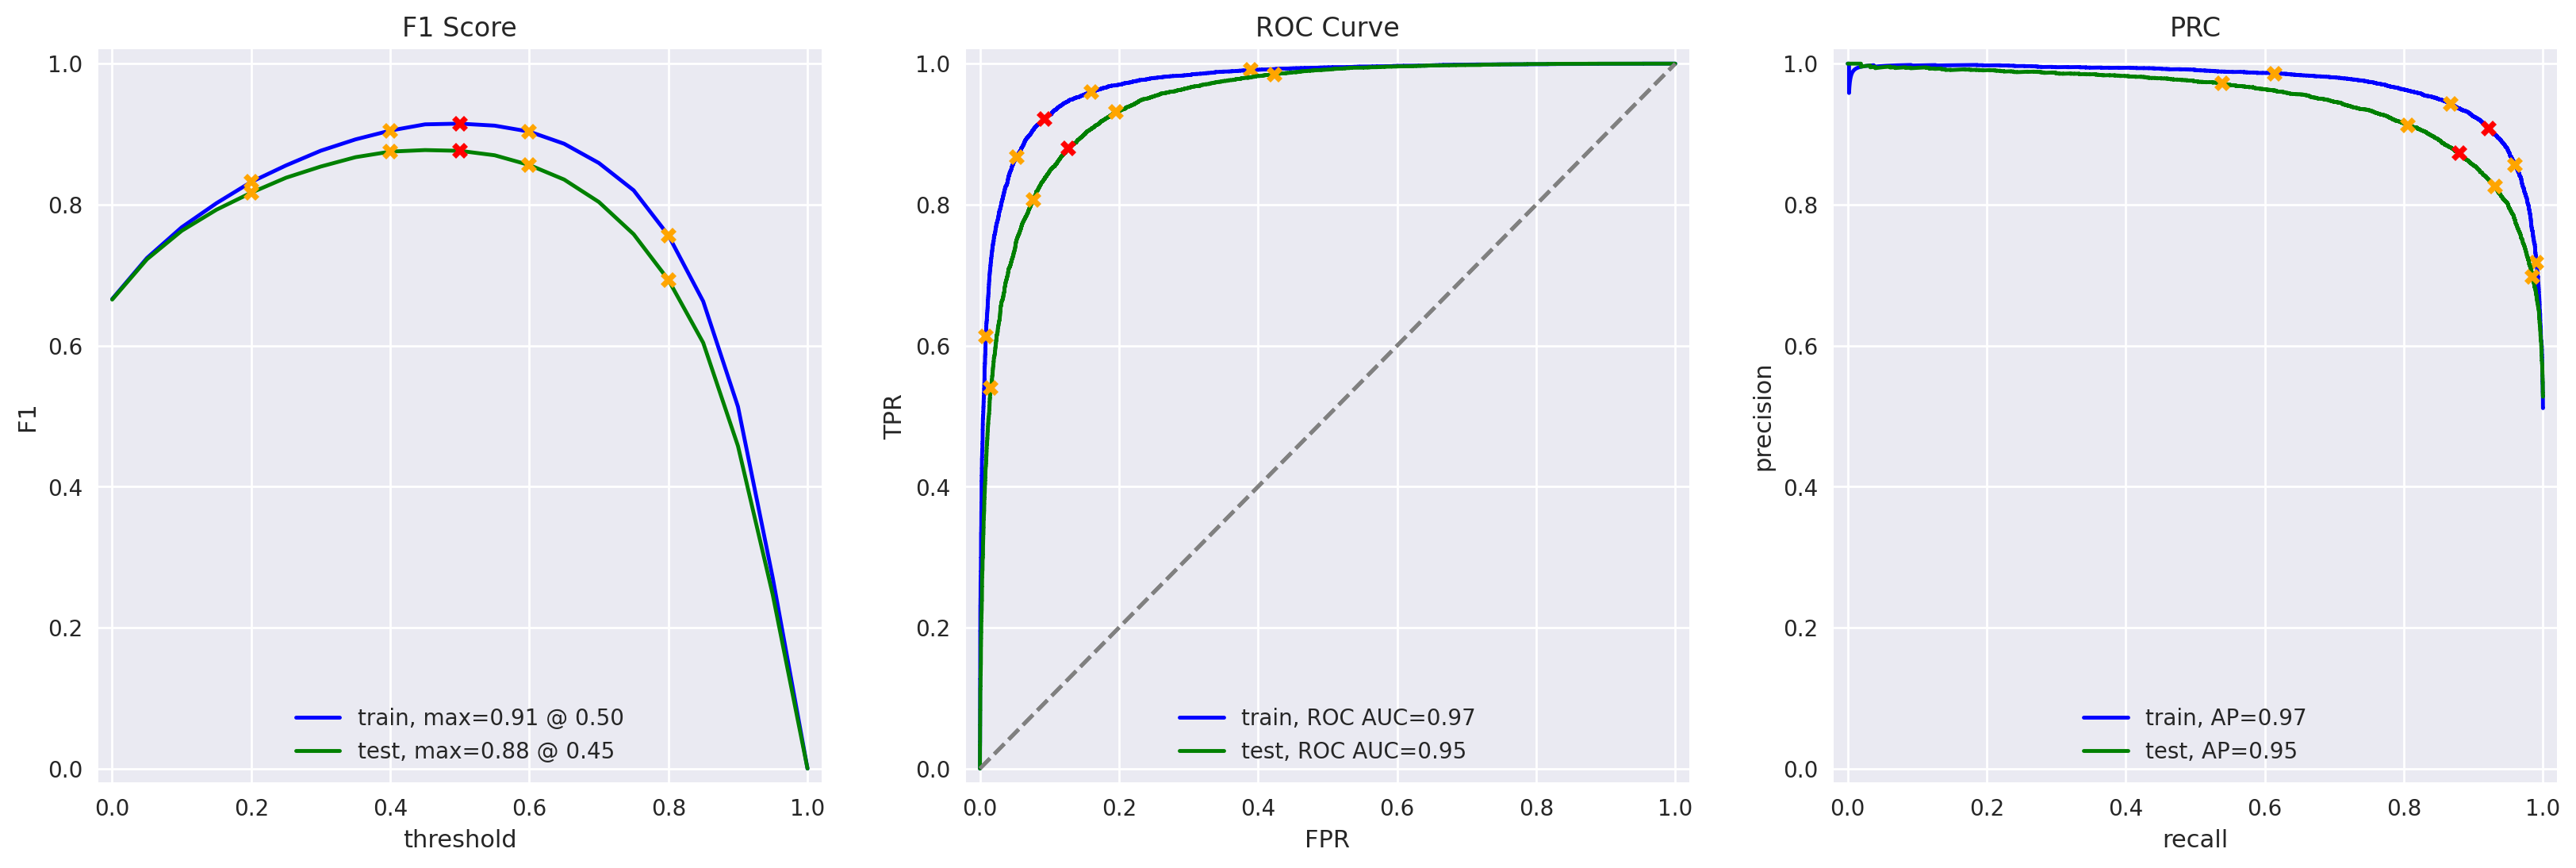

In [24]:
evaluate_model(log_reg, X_train_tfidf, train_target, X_test_tfidf, test_target)

<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
    
Correct. The model exceeds the F1 threshold and has good precision. 
    
</div>

## Model 

In [25]:
rf_class = RandomForestClassifier(n_estimators=250, random_state=42)

In [26]:
# 3. Transform test data
X_test_tfidf = tfidf.transform(df_reviews_test['review_norm'])

In [27]:
# Train the Random Forest model
print("Training Random Forest...")
rf_class.fit(X_train_tfidf, train_target)
print("Random Forest training complete!")

# Verify it worked
print(f"Model now has {rf_class.n_features_in_} features")

Training Random Forest...
Random Forest training complete!
Model now has 5000 features


In [28]:
# 4. Make predictions
predictions = rf_class.predict(X_test_tfidf)

In [29]:
# For your Random Forest
f1_rf = f1_score(test_target, predictions)
print(f"Random Forest F1 Score: {f1_rf}")

Random Forest F1 Score: 0.8446706638485095


In [30]:
# Trying to improve the model 
rf_class = RandomForestClassifier(n_estimators=250, max_depth=15, random_state=42)

In [31]:
# Train the Random Forest model with max_depth=15
print("Training Random Forest with max_depth=15...")
rf_class.fit(X_train_tfidf, train_target)
print("Random Forest training complete!")

# Verify it worked
print(f"Model now has {rf_class.n_features_in_} features")

Training Random Forest with max_depth=15...
Random Forest training complete!
Model now has 5000 features


In [32]:
for depth in [3, 5, 7, 10, 15, 20, None]:
    model = RandomForestClassifier(n_estimators=250, max_depth=depth, random_state=12345)
    model.fit(X_train_tfidf, train_target)  # Use train_target instead of y_train
    score = model.score(X_test_tfidf, test_target)  # Use your test data instead of validation data
    print(f"Max depth: {depth}, Score: {score}")

Max depth: 3, Score: 0.8169109836413851
Max depth: 5, Score: 0.8211599745060548
Max depth: 7, Score: 0.8208625451455279
Max depth: 10, Score: 0.8268111323560654
Max depth: 15, Score: 0.8299978755045677
Max depth: 20, Score: 0.8336944975568302
Max depth: None, Score: 0.8469513490545996


In [ ]:
# Basic LightGBM model setup
lgb_model = lgb.LGBMClassifier(
    objective='binary',  # You have 2 classes (pos/neg), so use 'binary'
    random_state=42,
    verbose=-1  # Reduces output noise
)

# Train the model with your existing TF-IDF features
lgb_model.fit(X_train_tfidf, train_target)  # Use train_target instead of y_train

# Make predictions
y_pred = lgb_model.predict(X_test_tfidf)  # Use X_test_tfidf instead of X_val_tfidf

# Evaluate
accuracy = accuracy_score(test_target, y_pred)  # Use test_target instead of y_val
print(f"LightGBM Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(test_target, y_pred))

1. Dummy Classifier (Baseline): 50.15%

This is the baseline - essentially random guessing
Any model significantly above this shows real predictive power

2. Logistic Regression: Best Overall Performer

Train: 91% accuracy, Test: 88% accuracy
Excellent generalization (only 3% drop from train to test)
High precision across all metrics (F1, APS, ROC AUC all ~95%)
This suggests TF-IDF features work very well with linear models

3. Random Forest: Good but Overfitting

Best depth: None (unlimited) with 84.7% F1
The performance keeps improving as depth increases
This suggests the model might benefit from more complex tuning

4. LightGBM: Solid Performance

85.6% accuracy with balanced precision/recall (0.86 each)
Good performance for a gradient boosting method
Competitive with Random Forest

<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
    
Very good!     
</div>

In [ ]:
# Evaluate all models on test data
from sklearn.metrics import accuracy_score, classification_report

# Get predictions on test data
log_reg_pred = log_reg.predict(X_test_tfidf)
rf_pred = rf_class.predict(X_test_tfidf)
lgb_pred = lgb_model.predict(X_test_tfidf)

# Calculate accuracies
print("=== MODEL PERFORMANCE ON TEST DATA ===")
print(f"Logistic Regression Accuracy: {accuracy_score(test_target, log_reg_pred):.4f}")
print(f"Random Forest Accuracy: {accuracy_score(test_target, rf_pred):.4f}")
print(f"LightGBM Accuracy: {accuracy_score(test_target, lgb_pred):.4f}")

## My Reviews

In [ ]:
# Updated review list with 6 reviews (3 positive, 3 negative)
my_reviews = [
    "Pitch Perfect: One of my top favorite movies! It has music and comedy shared with a competition battle performance.",
    "The Greatest Showman: Great movie to watch with the family. Even small children. Shares music as well with a great love story. Kids would love the circus aspect of it too, for fun and excitement.",
    "The Proposal: I love Sandra Bullock as an actress, so that's a huge plus! Also Betty White! RIP, so sad. Love story and a comedy.",
    "Epic Movie: It's a movie with too many main actors and actresses in it. Not enough depth. When it's over you sit there thinking what even happened?",
    "Borat: I know it's a comedy and ya sure there are funny moments but it's more annoying to me than funny.",
    "Murder Mystery: Could have been made better. Was kind of lame."
]


my_reviews_tfidf = tfidf.transform(my_reviews)  # ✅ Correct!

print("=== MY MOVIE REVIEWS PREDICTIONS ===\n")

for i, review in enumerate(my_reviews, 1):
    print(f"Review {i}: {review[:50]}...")
    print(f"Logistic Regression: {log_reg.predict(my_reviews_tfidf[i-1:i])[0]}")  # ✅ Correct!
    print(f"Random Forest: {rf_class.predict(my_reviews_tfidf[i-1:i])[0]}")      # ✅ Correct!
    print(f"LightGBM: {lgb_model.predict(my_reviews_tfidf[i-1:i])[0]}")         # ✅ Correct!
    print("-" * 50)

<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
    
    
Nice results! 
</div>


**Review Analysis**

Reviews 1-3: All models agree → Positive (1)

Review 6: All models agree → Negative (0)

Reviews 4-5: Models disagree → Mixed predictions

Models agree on clear sentiment
Models struggle with ambiguous/complex language
Human writing style (sarcasm, qualifiers) affects predictions

In [ ]:
X_train_tfidf.shape

**Compare the training accuracy vs. validation/test accuracy for each model**

- No overfitting: Training and test accuracies are similar
- Overfitting: Training accuracy is much higher than test accuracy

In [ ]:
# For Random Forest 
rf_train_score = rf_class.score(X_train_tfidf, train_target)
rf_test_score = rf_class.score(X_test_tfidf, test_target)

print(f"Random Forest - Train: {rf_train_score:.4f}, Test: {rf_test_score:.4f}")

# For LightGBM
lgb_train_score = lgb_model.score(X_train_tfidf, train_target)
lgb_test_score = lgb_model.score(X_test_tfidf, test_target)

print(f"LightGBM - Train: {lgb_train_score:.4f}, Test: {lgb_test_score:.4f}")

# For Logistic Regression
log_train_score = log_reg.score(X_train_tfidf, train_target)
log_test_score = log_reg.score(X_test_tfidf, test_target)

print(f"Logistic Regression - Train: {log_train_score:.4f}, Test: {log_test_score:.4f}")

Why Logistic Regression Wins:
Best generalization
Smallest gap between training and test
Highest test accuracy
87.62% vs 83.40% (Random Forest) and 85.58% (LightGBM)
Less overfitting
It's learning the true patterns, not memorizing noise

## Conclusions

Based on comprehensive model evaluation, Logistic Regression emerged as the optimal solution for Film Junky Union's sentiment analysis needs. While three models were tested, only two met the project requirement of F1 ≥ 0.85:

LightGBM: F1 = 0.86
Logistic Regression: F1 = 0.88

Logistic Regression demonstrated superior performance with the highest test accuracy (87.62%) and minimal overfitting (training-test gap of only 3.82%), compared to LightGBM's 5.44% gap. This indicates better generalization to new movie reviews.

Real-world validation using custom movie reviews revealed that while all models achieved strong performance on clear sentiment expressions, they struggled with ambiguous language, sarcasm, and complex human writing styles. This finding suggests the need for human oversight in edge cases. 

<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
    

Excellent, thank you so much! 

</div>


# Checklist

- [x]  Notebook was opened
- [x]  The text data is loaded and pre-processed for vectorization
- [x]  The text data is transformed to vectors
- [x]  Models are trained and tested
- [x]  The metric's threshold is reached
- [x]  All the code cells are arranged in the order of their execution
- [x]  All the code cells can be executed without errors
- [x]  There are conclusions